In [8]:
import requests
import pandas as pd


response = requests.request("GET", "https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.csv")
print(response.status_code)
#print(response.content)
print(type(response))
#data = pd.read_csv(response.content)
#data.head()

200
<class 'requests.models.Response'>


In [11]:
import requests
import pandas as pd
from io import StringIO

# Make the API call and get the response
url = "https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.csv"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use Pandas to read the CSV data from the response and create a DataFrame
    df = pd.read_csv(StringIO(response.text))
    # Now, 'df' contains the data in a Pandas DataFrame
    print(df.head(100))  # Display the first few rows of the DataFrame
else:
    print("API request failed with status code:", response.status_code)



          Date  Value
0   2023-09-07  92.97
1   2023-09-06  92.30
2   2023-09-05  91.44
3   2023-09-04  91.27
4   2023-09-01  89.66
..         ...    ...
95  2023-04-27  78.40
96  2023-04-26  81.12
97  2023-04-25  82.95
98  2023-04-24  82.30
99  2023-04-21  81.86

[100 rows x 2 columns]


In [12]:
import requests
import pandas as pd
from io import StringIO

# Make the API call and get the response
url = "https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.csv"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use Pandas to read the CSV data from the response and create a DataFrame
    df = pd.read_csv(StringIO(response.text))
    
    # Convert the 'Date' column to a datetime data type
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Now, 'df' is a time series with 'Date' as the index
    print(df.head())  # Display the first few rows of the time series DataFrame
else:
    print("API request failed with status code:", response.status_code)


            Value
Date             
2023-09-07  92.97
2023-09-06  92.30
2023-09-05  91.44
2023-09-04  91.27
2023-09-01  89.66


https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL.csv?collapse=none&start_date=2018-03-22&end_date=2018-03-27&api_key=tMexE-dhnFFSApsTQVgz


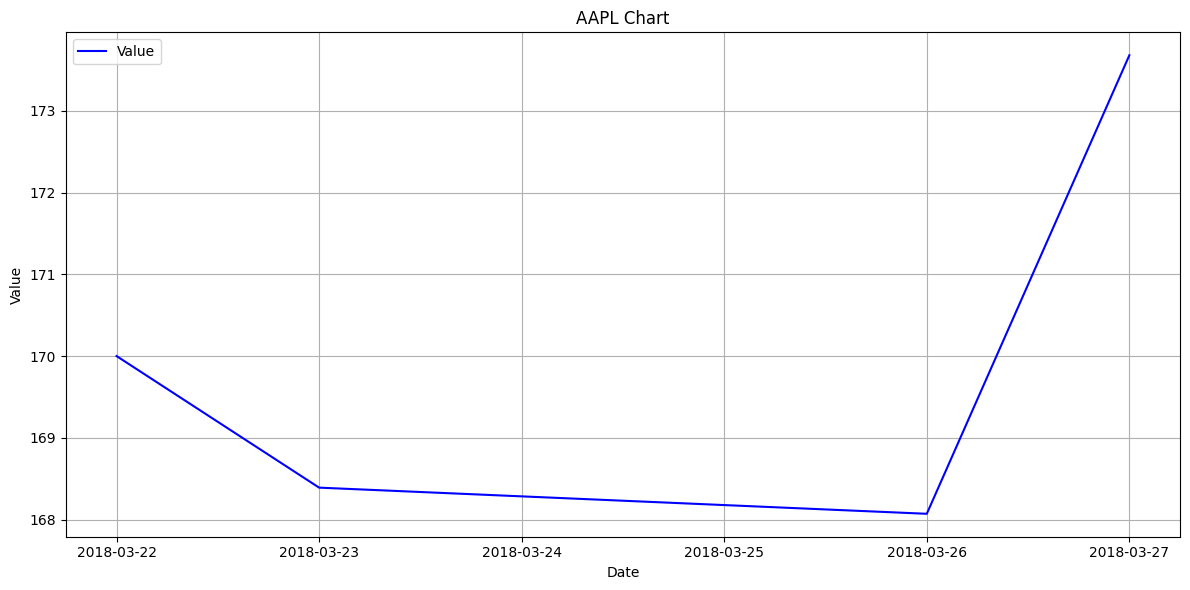

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime, timedelta

def get_date_range(time_range):
    end_date = datetime.strptime('2018-03-27', '%Y-%m-%d')
    start_date = None
    
    if time_range == '1d':
        start_date = end_date - timedelta(days=1)
    elif time_range == '5d':
        start_date = end_date - timedelta(days=5)
    elif time_range == '1m':
        start_date = end_date - timedelta(days=30)
    elif time_range == '1y':
        start_date = end_date - timedelta(days=365)
    else:
        return None, None  # Invalid time_range
    
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')


tickerName = input("Type a stock ticker symbol")
tickerName = tickerName.upper()
# Make the API call and get the response
#url = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{tickerName}.csv"
time_range = input("Choose a time range ('1d', '5d', '1m', '1y'): ").strip()
start_date, end_date = get_date_range(time_range)
#url = "https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL.csv?start_date=2023-07-10&end_date=2023-09-05"
url = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{tickerName}.csv?collapse=none&start_date={start_date}&end_date={end_date}&api_key=tMexE-dhnFFSApsTQVgz"
print(url)

response = requests.get(url)

# Get user input for time range


# Check if the request was successful
if response.status_code == 200:
    # Use Pandas to read the CSV data from the response and create a DataFrame
    df = pd.read_csv(StringIO(response.text))
    
    # Convert the 'Date' column to a datetime data type
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Create a time series line chart
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(df.index, df['Open'], linestyle='-', color='b', label='Value')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{tickerName} Chart')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # Display the chart
    plt.show()
else:
    print("API request failed with status code:", response.status_code)


https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL.csv?collapse=none&start_date=2017-03-27&end_date=2018-03-27&api_key=tMexE-dhnFFSApsTQVgz


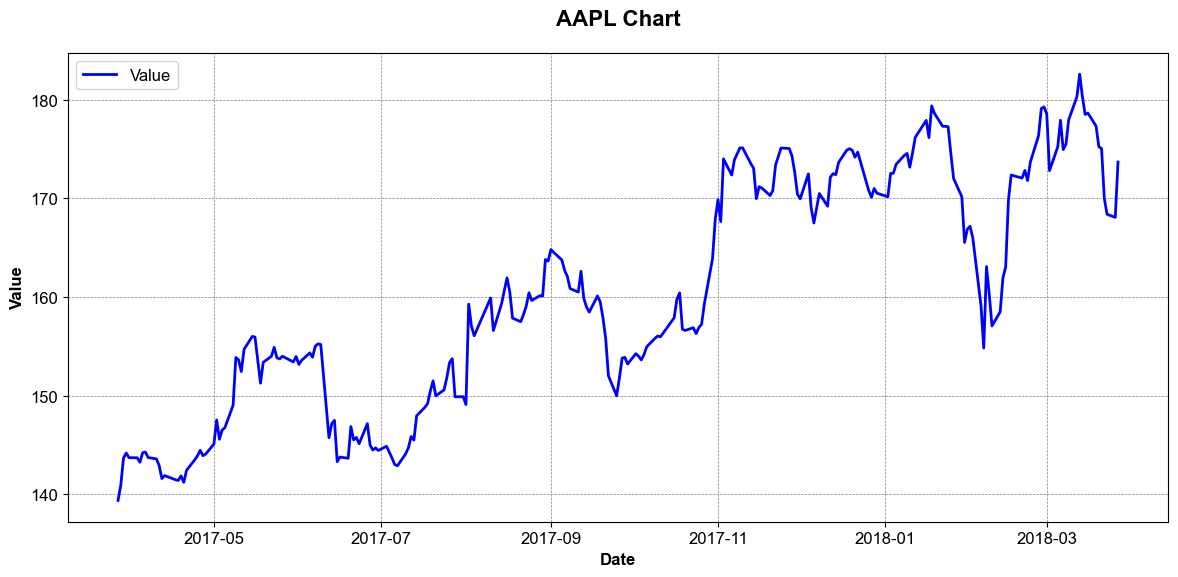

In [39]:

dyslexia_friendly_settings = {
    'font.family': 'Arial',
    'font.size': 14,
    'font.style': 'normal',  
    'axes.labelsize': 12,    
    'axes.titlesize': 16,    
    'axes.titleweight': 'bold',
    'axes.titlepad': 20,     
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,   
    'ytick.labelsize': 12,   
    'legend.fontsize': 12,   
    'lines.linewidth': 2,    
    'lines.markersize': 8,   
    'legend.title_fontsize': 12,
    'axes.labelcolor': 'black',  
    'text.color': 'black',  
    'axes.edgecolor': 'black',  
    'axes.facecolor': 'white',  
    'axes.grid': True,      
    'axes.grid.axis': 'both',  
    'grid.color': 'gray',   
    'grid.linestyle': '--',  
    'grid.linewidth': 0.5   
}

import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime, timedelta

def get_date_range(time_range):
    end_date = datetime.strptime('2018-03-27', '%Y-%m-%d')
    start_date = None
    
    if time_range == '1d':
        start_date = end_date - timedelta(days=1)
    elif time_range == '5d':
        start_date = end_date - timedelta(days=5)
    elif time_range == '1m':
        start_date = end_date - timedelta(days=30)
    elif time_range == '1y':
        start_date = end_date - timedelta(days=365)
    else:
        return None, None  # Invalid time_range
    
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')


tickerName = input("Type a stock ticker symbol")
tickerName = tickerName.upper()
# Make the API call and get the response
#url = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{tickerName}.csv"
time_range = input("Choose a time range ('1d', '5d', '1m', '1y'): ").strip()
start_date, end_date = get_date_range(time_range)
#url = "https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL.csv?start_date=2023-07-10&end_date=2023-09-05"
url = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{tickerName}.csv?collapse=none&start_date={start_date}&end_date={end_date}&api_key=tMexE-dhnFFSApsTQVgz"
print(url)

response = requests.get(url)

# Get user input for time range


# Check if the request was successful
if response.status_code == 200:
    # Use Pandas to read the CSV data from the response and create a DataFrame
    df = pd.read_csv(StringIO(response.text))
    
    # Convert the 'Date' column to a datetime data type
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Create a time series line chart
    plt.rcParams.update(dyslexia_friendly_settings)
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(df.index, df['Open'], linestyle='-', color='b', label='Value')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{tickerName} Chart')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # Display the chart
    plt.show()
else:
    print("API request failed with status code:", response.status_code)


Text(0.5, 1.0, 'This is some random font')

findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font family '/Users/colbyeagan/Desktop/codingRepos/lexiGraph/OpenDyslexic3-Regular.ttf' not found.
findfont: Font fami

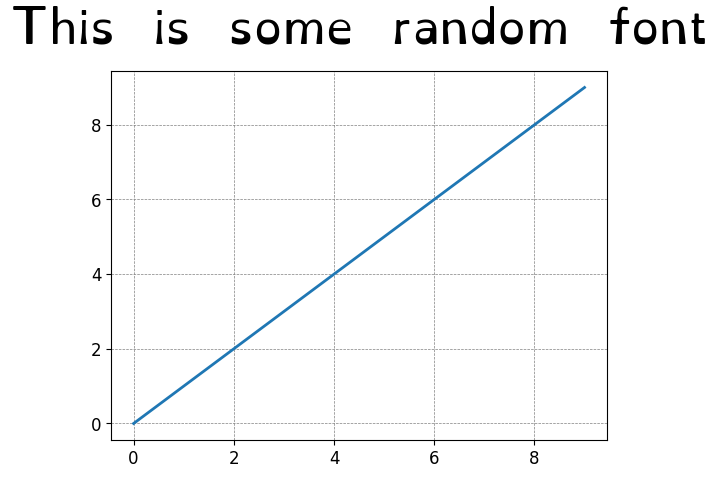

In [34]:
import matplotlib.font_manager as fm

fig, ax = plt.subplots()
ax.plot(range(10))

prop = fm.FontProperties(fname='OpenDyslexic3-Regular.ttf')
ax.set_title('This is some random font', fontproperties=prop, size=32)


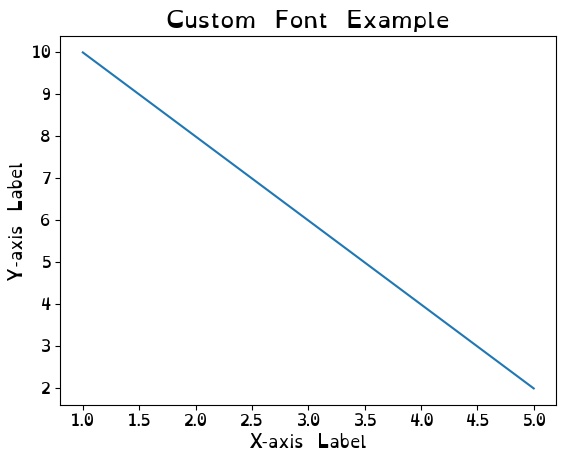

In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
custom_font_path = 'OpenDyslexic3-Regular.ttf'
custom_font = FontProperties(fname=custom_font_path)
# Example plot
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

plt.plot(x, y)

# Set the font properties for the title and labels
plt.title("Custom Font Example", fontproperties=custom_font, fontsize=16)
plt.xlabel("X-axis Label", fontproperties=custom_font, fontsize=12)
plt.ylabel("Y-axis Label", fontproperties=custom_font, fontsize=12)

# Customize other text elements like tick labels if needed
plt.xticks(fontproperties=custom_font, fontsize=10)
plt.yticks(fontproperties=custom_font, fontsize=10)

# Show the plot
plt.show()
